In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import math
import PyUltraLight_SI
import density_profile_V4
import pyfftw
import os
import sys
import multiprocessing
import numpy
import numba
import h5py
from IPython.core.display import clear_output, display
%matplotlib inline

# Set Axion Mass

In [2]:
axion_mass = 1e-22 *1.783e-36 #kg

# Set Simulation Parameters

In [3]:
# Set number of threads to target
num_threads = multiprocessing.cpu_count()

# Set units for soliton parameters
s_mass_unit = ''     #Accepted units: 'kg', 'solar_masses', 'M_solar_masses', and '' for dimensionless units
s_position_unit = '' #Accepted units: 'm', 'km', 'pc', 'kpc', 'Mpc', 'ly', and '' for dimensionless units
s_velocity_unit = '' #Accepted units: 'm/s', 'km/s', 'km/h', and '' for dimensionless units

# Set box size and resolution
length = 8 # 1 code unit is ~38 kpc x (1e-22/m_a)^0.5
length_units = ''  # Accepted units: 'm', 'km', 'pc', 'kpc', 'Mpc', 'ly', and '' for dimensionless units.
resol= 256 # It is recommended to check the upper bound on soliton mass for a given box size and resolution
duration = 0.013 # 1 code unit is ~70 Gyr (independent of axion mass assumption)
duration_units = ''  # Accepted units: 's', 'yr', 'kyr', 'Myr', and '' for dimensionless units
start_time = 0.0 # Should be given in the same units as duration. 
central_mass = 0.0 # Give this parameter in the same units as the soliton mass unit. i.e. units must match with s_mass_unit

#Data to save
save_rho = True # Saves density data for entire 3D simulation grid
save_psi = False # Saves full complex field data for entire 3D simulation grid
save_plane = True # Saves density data for plane z = 0
save_energies = False # Saves integrated gravitational, kinetic and total energies as lists
save_line = False # Saves density data for line y = 0, z = 0. Useful for examining intereference patterns. 

#Formats to save
hdf5 = False
npz = False
npy = True

step_factor = 1. # Change this to a larger number if velocities are sufficiently low that constraint on timestep can be relaxed. 
save_number = 10    # Choose number of 'frames' to save. Note that, depending on resolution, this could require significant disk space.
save_path = 'TestOutput'  # Set output directory

save_options = [save_rho,save_psi,save_plane,save_energies,save_line]

# Set Initial Conditions:

In [4]:
#m_1 = 20 #1 code unit is ~2.3e6 M_sol (1e-22/m_a)^1.5
#m_2 = 20
m = 20
#m_3 = 10000
#r = 0.27772 #1 code unit is ~38 kpc x (1e-22/m_a)^0.5
#v = np.sqrt(central_mass/r)

#Soliton parameters are mass, position, velocity and phase (radians)

#Only one
soliton1 = [m , [0,0,0], [0,0,0], 0]

#x-Mergers
#soliton1 = [2*m, [r,0,0], [-5,0,0], 0]
#soliton2 = [m, [-r,0,0], [5,0,0], 0]

#diagonal Mergers
#v=3.53553 # for 5 km/s relative velocity
#v=2.82843 # for 4 km/s relative velocity
#v=2.12132 # for 3 km/s relative velocity
#v=1.41421 # for 2 km/s relative velocity
#v=0.70711  # for 1 km/s relative velocity
#v=0.35355 # for 0.5 km/s relative velocity
#v=0.17678 # for 0.25 km/s relative velocity
#soliton1 = [m, [r,r,0], [-v,-v,0], 0]
#soliton2 = [m, [-r,-r,0], [v,v,0], 0]

#Kx-Ky-Kz-Merger
#soliton1 = [m, [r,0,0], [-5,0,0], 0]
#soliton2 = [m, [0,r,0], [0,-5,0], 0]
#soliton3 = [m, [0,0,r], [0,0,-5], 0]
#soliton4 = [m, [-r,0,0], [5,0,0], 0]
#soliton5 = [m, [0,-r,0], [0,5,0], 0]
#soliton6 = [m ,[0,0,-r], [0,0,5], 0]

solitons = [soliton1]#,soliton2,soliton3,soliton4,soliton5,soliton6]  


# Run:

In [5]:
PyUltraLight_SI.evolve(central_mass, num_threads, length, length_units, resol, duration, duration_units, step_factor, save_number, save_options, save_path, npz, npy, hdf5, s_mass_unit, s_position_unit, s_velocity_unit, solitons, start_time)



Complete.


# Visualisations:

In [6]:
output_animated = 1
# 0 for all contours plotted on a single graph (useful when total number of saves is <=10), 
# 1 for an animation of plane of density contours (useful when number of saves is large, may take some time),
# 2 for plot of energies over time, 
# 3 for animation of line along axis of symmetry (useful for studying interference patterns).
save_plots = 0 
# 0 to display in this window without saving,
# 1 to save as well (will save in 'Visualisations' directory).

#######################################################################

with open('{}{}'.format(save_path, '/timestamp.txt'), 'r') as timestamp:
  ts = timestamp.read()

loc = save_path + '/' + ts

if output_animated == 2:

    egylist = np.load('{}{}'.format(loc, '/egylist.npy')).tolist()
    egpcmlist = np.load('{}{}'.format(loc, '/egpcmlist.npy')).tolist()
    egpsilist = np.load('{}{}'.format(loc, '/egpsilist.npy')).tolist()
    ekandqlist = np.load('{}{}'.format(loc, '/ekandqlist.npy')).tolist()
    masslist = np.load('{}{}'.format(loc, '/masslist.npy')).tolist()
    plt.plot(egylist,label='Total')
    plt.plot(egpcmlist,label='$E_{GP}$ (central potential)')
    plt.plot(egpsilist,label='$E_{GP}$ (self-interaction)')
    plt.plot(ekandqlist,label='$E_{K}+E_{Q}$')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), frameon=False, ncol=2)
    plt.axes().get_xaxis().set_ticks([])
    plt.ylabel('Energy')
    plt.xlabel('Time')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    if save_plots == 1:
        plt.savefig('./Visualisations/energy_diagram.eps', format='eps', dpi=1000)
        plt.savefig('./Visualisations/energy_diagram.jpg', format='jpg', dpi=1000)
    plt.show()

if output_animated == 0:
    import warnings 
    warnings.filterwarnings("ignore")
    plt.ioff()
    plt.figure(figsize=(20,10))
    for x in np.arange(0,save_number+1,1):
        if x == 0:
            plt.contour(np.load('{}{}{}{}'.format(loc, '/plane_#',x,'.npy')),colors='k')
        if x in np.arange(1,save_number+1,1):
            plt.contour(np.load('{}{}{}{}'.format(loc, '/plane_#',x,'.npy')))
            plt.axes().set_aspect('equal')
            plt.axes().get_xaxis().set_ticks([])
            plt.axes().get_yaxis().set_ticks([])
    if save_plots == 1:
        plt.savefig('{}'.format('./Visualisations/Static_contours.eps'), format='eps', dpi=1000)
        plt.savefig('{}'.format('./Visualisations/Static_contours.jpg'), format='jpg', dpi=1000)
    plt.show()

if output_animated in (1,3):        

    import warnings 
    warnings.filterwarnings("ignore")
    plt.ioff()
    
    # here the figsizes for line and plane-plots can be ajusted
    if output_animated == 1:
        fig,ax = plt.subplots(figsize=(12, 12))
    elif output_animated == 3:
        fig,ax = plt.subplots(figsize=(15, 10))
    
    # section to load in the data to animate
    data = []
    
    for x in np.arange(0,save_number+1,1):
        if output_animated == 1:
            data.append(np.load('{}{}{}{}'.format(loc, '/plane_#', x, '.npy')))
        if output_animated == 3:
            data.append(np.load('{}{}{}{}'.format(loc, '/line_#', x, '.npy')))
    if output_animated == 3:
        m = []
        for i in np.arange(0,save_number+1,1):
            m.append(max(data[i]))
            lim = max(m)
    
    # creation of an symmetrcial axis, that has its midpoint in the center
    code_axis = np.linspace(0, length, resol)
    symmetrical_axis = np.zeros(resol)
    
    for e in range(0,resol):
        symmetrical_axis[e] = code_axis[e]-length/2
    
    X, Y = np.meshgrid(symmetrical_axis, symmetrical_axis)
    
    def animate(i):
        plt.clf()
        if output_animated == 1:
            plot = plt.contour(X, Y, data[i])
            plt.xlabel("y-distance [CE]", fontsize = 14)
            plt.ylabel("x-distance [CE]", fontsize = 14)
            plt.title('Mass Density - Plane', fontsize = 15)
        if output_animated == 3:
            plt.clf()
            plot = plt.plot(symmetrical_axis, data[i])
            plt.xlabel("x-distance [CE]", fontsize =15)
            plt.ylabel("density along x-direction [CE]", fontsize = 15)
            plt.title('Mass Density - Line', fontsize = 16)
            plt.gca().set_ylim(bottom = 0, top = lim*1.1)

    Writer = matplotlib.animation.writers['ffmpeg']
    writer = Writer(fps=15, metadata=dict(artist='PyUltraLight'), bitrate=1800)
            
    interval = 0.5 # in seconds
    ani = matplotlib.animation.FuncAnimation(fig,animate,save_number+1,interval=interval*1e+3,blit=False)
    if save_plots == 1:
        if output_animated == 1:
            ani.save('./Visualisations/plane_animation.mp4', writer=writer)
        if output_animated == 3:
            ani.save('./Visualisations/line_animation.mp4', writer=writer)

            
    from IPython.display import HTML
    animated_plot = HTML(ani.to_jshtml())

    if save_plots == 1:  
        save_html = animated_plot.data
        if output_animated == 1:
            with open('./Visualisations/plane_animation.html', 'w') as f:
                f.write(save_html)
        if output_animated == 3:
            with open('./Visualisations/line_animation.html', 'w') as f:
                f.write(save_html)
    display(animated_plot) 
    plt.close()    


  

# Density Profile:

In [7]:
# define parameters
state = 10  # state of the simulation which will be converted into a radial density profile; must match one of the frame numbers
p = 0.99     # percent of mass that R_p contains; should be between 0 and 1
method = 'T' # method for the mass and R_p calculation; available: 'T' for trapez rule, 'S' for integration with sphercial shells
save_figure = 'y' # to save the density profile from below; 'y' for yes, other string for no

# Fitpreperation, mass and R_p calculation
radius = density_profile_V4.Fitpreperation(loc, state, length, resol)[0]
density = density_profile_V4.Fitpreperation(loc, state, length, resol)[1]
R_p = density_profile_V4.mass_and_R_p_calculation(radius, density, p, solitons, method)

# use fitting routine
radial_density_fit = density_profile_V4.fitting(radius, density, solitons)

For the mass and R_p calculation the integration with the trapez rule-method was used.
The total mass should be 20 CE.
The calculated total mass is 160.219 CE.
The radius, that contains 99.0% of the mass is 23.378 kpc.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


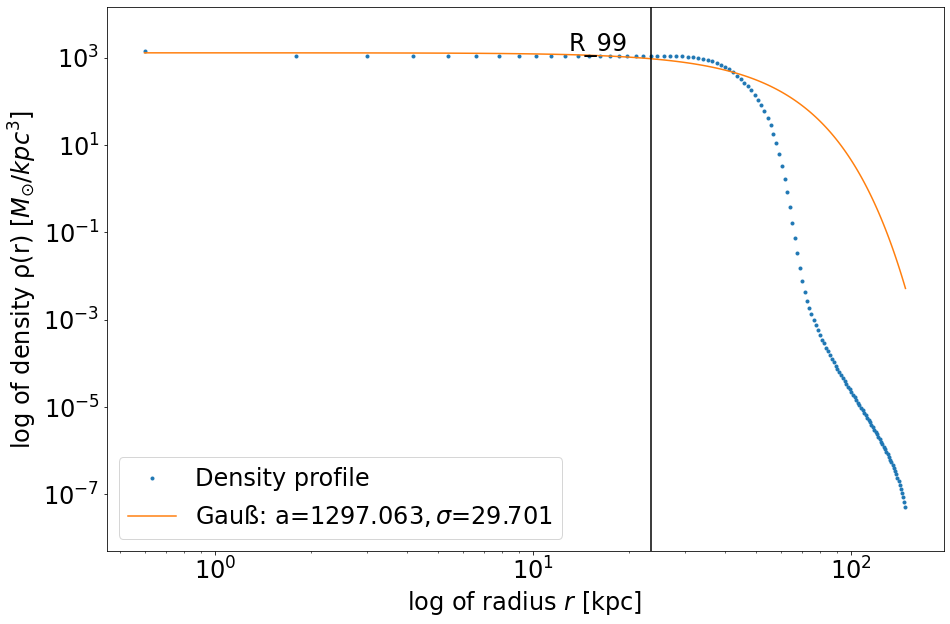

In [9]:
#Plotting section
plt.figure(figsize=(15,10))
plt.plot(radius, density, ".", label = "Density profile")
if radial_density_fit[0] == "Gauß":
    plt.plot(radial_density_fit[1][0], density_profile_V4.Gauß(radial_density_fit[1][0], *radial_density_fit[2]), label = "Gauß: a=" + str(round(radial_density_fit[2][0],3)) + "$, \sigma$=" + str(round(radial_density_fit[2][1],3)))
else:
    plt.plot(radial_density_fit[1][0], density_profile_V4.Schive(radial_density_fit[1][0], *radial_density_fit[3]), label = "Schive: $\delta_{s}$=" + str(round(radial_density_fit[3][0],3)) + ", $r_{sol}$=" + str(round(radial_density_fit[3][1],3)))
if len(solitons)>1:
    plt.plot(radial_density_fit[1][1], density_profile_V4.NFW(radial_density_fit[1][1], *radial_density_fit[4]), label = "NFW: $\delta_{NFW}$=" + str(round(radial_density_fit[4][0],3)) + ", $r_{s}$=" + str(round(radial_density_fit[4][1],3)))
plt.xscale("log")
plt.yscale("log")
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel("log of radius $r$ [kpc]", fontsize=24)
plt.ylabel("log of density ρ(r) $[M_{\odot}/kpc^3]$", fontsize = 24)
plt.axvline(R_p, c='black')
plt.text(R_p-10.5,max(density), "R_" + str(int(p*100)), c='black', fontsize = 24)
plt.legend(loc="lower left", fontsize = 24)
#Limitation, which is only necessary in the case for one soliton
if min(density)==0:
    plt.gca().set_ylim(bottom=density[density.index(min(density))-1]*10**(-2), top=max(density)*10)
else:
    plt.gca().set_ylim(bottom=min(density)*10**(-1), top=max(density)*10)
if save_figure == 'y':
    plt.savefig(loc + "/density_profile_state" + str(state)+ ".jpg", bbox_inches='tight')
    plt.savefig(loc + "/density_profile_state" + str(state)+ ".eps", format='eps', dpi = 1000, bbox_inches='tight')
plt.show()